
# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

The dataset used for this analysis is the TMDb (The Movie Database) movies dataset. This dataset contains information about movies, including various attributes such as budget, revenue, cast, crew, and more. Below is a brief description of the columns in the dataset:

- **id**: Unique identifier for each movie.
- **imdb_id**: IMDB identifier for each movie.
- **popularity**: Popularity score of the movie.
- **budget**: Budget of the movie in dollars.
- **revenue**: Revenue of the movie in dollars.
- **original_title**: Original title of the movie.
- **cast**: Main cast of the movie.
- **homepage**: Homepage URL of the movie.
- **director**: Director of the movie.
- **tagline**: Tagline of the movie.
- **keywords**: Keywords associated with the movie.
- **overview**: Brief description of the movie.
- **runtime**: Runtime of the movie in minutes.
- **genres**: Genres of the movie.
- **production_companies**: Production companies involved in the movie.
- **release_date**: Release date of the movie.
- **vote_count**: Number of votes the movie received.
- **vote_average**: Average rating of the movie.
- **release_year**: Release year of the movie.
- **budget_adj**: Adjusted budget of the movie for inflation.
- **revenue_adj**: Adjusted revenue of the movie for inflation.

This dataset provides a comprehensive view of various aspects of movies, which can be used to perform detailed analysis and derive insights related to movie production, popularity, financial performance, and more.


### Questions for Analysis

1. **What is the relationship between the budget and revenue of movies?**
   - **Dependent Variable**: Revenue
   - **Independent Variables**: Budget, Popularity, Runtime

2. **How does the release date impact the popularity of movies?**
   - **Dependent Variable**: Popularity
   - **Independent Variables**: Release Date, Genres, Vote Count

3. **Which genres tend to have higher average ratings?**
   - **Dependent Variable**: Vote Average
   - **Independent Variables**: Genres, Director, Cast

4. **Which genres are most popular from year to year?**
   - **Dependent Variable**: Popularity
   - **Independent Variables**: Release Year, Genres

5. **What kinds of properties are associated with movies that have high revenues?**
   - **Dependent Variable**: Revenue
   - **Independent Variables**: Budget, Popularity, Runtime, Genres, Director, Cast


> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names.

<a id='wrangling'></a>
## Data Wrangling

In this section, we will load the dataset and perform data cleaning steps to prepare it for analysis. We will perform exploratory data analysis to investigate the research questions posed in the introduction. We will compute statistics and create visualizations to explore the relationships and patterns in the dataset.
>
> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [300]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Load the dataset
df = pd.read_csv('tmdb-movies.csv')
# Display the first few rows of the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### df.head() provides the following insights:
- The dataset contains several columns, including id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, and revenue_adj.

In [301]:
# Display general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### The dataset contains 10866 rows and 21 columns. There are several columns with missing values, including:
- imdb_id (10 missing values)
- cast (76 missing values)
- homepage (7930 missing values)
- director (44 missing values)
- tagline (2824 missing values)
- keywords (1493 missing values)
- overview (4 missing values)
- genres (23 missing values)
- production_companies (1030 missing values)


In [302]:
# Display summary statistics of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### df.describe() provides the following insights:
 - The budget and revenue columns have a minimum value of zero, which indicates missing or incorrect data.
 - The popularity column has a wide range of values, with a maximum value of 32.98.
 - The runtime column has a minimum value of zero, which indicates missing or incorrect data.
- The vote_count column has a wide range of values, with a maximum value of 9767.
- The vote_average column has a wide range of values, with a maximum value of 9.2.
- The release_year column has a range from 1960 to 2015.
- The budget_adj and revenue_adj columns have a minimum value of zero, which indicates missing or incorrect data.
- The vote_average column has a wide range of values, with a maximum value of 8.4.


In [303]:
# Check the shape of the dataset
df.shape

(10866, 21)

#### The dataset contains 10866 rows and 21 columns.

In [304]:
# Check the data types of columns in the dataset
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

#### The dataset contains columns with the following data types:
- int64: id, popularity, budget, revenue, runtime, vote_count, release_year
- float64: budget_adj, revenue_adj
- object: imdb_id, original_title, cast, homepage, director, tagline, keywords, overview, genres, production_companies, release_date
- float64 and int64 data types are appropriate for numerical columns.
- object data type is appropriate for text columns.
- We may need to convert the release_date column to datetime data type for analysis.

In [305]:
# Check for missing values in the dataset
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning

In this section, we will clean the dataset by handling missing values, removing duplicates, converting data types, and filtering the data.
We will perform the following data cleaning steps:
1. **Drop unnecessary columns**: We remove columns that we don't need for our analysis to make our dataset smaller and easier to work with.

2. **Drop duplicate rows**: We remove any repeated rows to ensure each movie is only listed once.

3. **Handle missing values**: We fill in or remove missing data to avoid errors in our analysis.

4. **Convert data types**: We change the format of some columns to the correct type (like dates and numbers) so we can use them properly.

5. **Filter out zero values**: We remove rows where the budget or revenue is zero because they don't provide useful information.

6. **Extract release year**: We create a new column for the release year from the release date to make it easier to analyze movies by year.

7. **Split columns into separate rows**: We split columns like genres and cast into separate rows to analyze each genre and cast member individually.

8. **Create adjusted budget and revenue**: We add new columns for budget and revenue adjusted for inflation to compare movies from different years fairly.

9. **Remove zero values in adjusted columns**: We remove rows where the adjusted budget or revenue is zero for the same reason as step 5.

10. **Filter movies released after 2000**: We only keep movies released after the year 2000 to focus our analysis on more recent films.

11. **Check the final shape**: We check the size and structure of our cleaned dataset to ensure everything looks correct.




In [306]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Drop unnecessary columns
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies'], axis=1, inplace=True)

In [307]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [308]:
# Handle missing values
df.dropna(subset=['cast', 'director', 'genres'], inplace=True)

In [309]:
# Convert data types
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')

In [310]:
# Filter out zero values
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]

In [311]:
# Extract release year
df.loc[:, 'release_year'] = df['release_date'].dt.year


In [312]:
# Split genres into separate rows
df = df.assign(genres=df['genres'].str.split('|')).explode('genres')

In [313]:
# Split cast into separate rows
df = df.assign(cast=df['cast'].str.split('|')).explode('cast')

In [314]:
# Create adjusted budget and revenue
# Assuming the adjusted columns are already present in the dataset
# We will use the existing columns for our analysis

In [315]:
# Remove zero values in adjusted columns
df = df.query('budget_adj > 0 and revenue_adj > 0')

In [316]:
# Filter movies released after 2000
df = df.query('release_year >= 2000')

In [317]:
# Check null values again
df.isnull().sum().any()

np.False_

In [318]:
# Check the final shape
df.shape

(33508, 15)

In [319]:
# Display the first few rows of the cleaned dataset
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Irrfan Khan,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Nick Robinson,Colin Trevorrow,124,Action,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### What is the relationship between the budget and revenue of movies?
   - **Dependent Variable**: Revenue
   - **Independent Variables**: Budget, Popularity, Runtime

In [320]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# Filter the dataset to include only relevant columns and non-zero values
df_revenue = df[['budget', 'revenue', 'popularity', 'runtime']]
df_revenue = df_revenue[(df_revenue['budget'] > 0) & (df_revenue['revenue'] > 0) & (df_revenue['runtime'] > 0)]


In [321]:
# Display summary statistics for budget, popularity, runtime, and revenue
print("Summary Statistics:\n", df_revenue.describe())

Summary Statistics:
              budget       revenue    popularity       runtime
count  3.350800e+04  3.350800e+04  33508.000000  33508.000000
mean   4.956044e+07  1.366798e+08      1.434139    109.282500
std    5.096530e+07  2.152301e+08      1.848136     20.366849
min    1.000000e+00  2.000000e+00      0.001117     15.000000
25%    1.400000e+07  1.670286e+07      0.543869     96.000000
50%    3.200000e+07  6.027317e+07      0.932599    106.000000
75%    7.000000e+07  1.592918e+08      1.643140    119.000000
max    4.250000e+08  2.781506e+09     32.985763    338.000000


#### Summary Statistics:
- The average budget of movies is approximately 49.5 million, with a maximum budget of 425 million.
- The average revenue of movies is approximately 136.6 million, with a maximum revenue of 2.78 billion.
- The average popularity score of movies is approximately 1.5, with a maximum popularity score of 32.98.
- The average runtime of movies is approximately 109 minutes, with a maximum runtime of 338 minutes.
- The budget and revenue columns have a wide range of values, with a maximum value of 425 million and 2.78 billion, respectively.
- The popularity column has a wide range of values, with a maximum value of 32.98.


In [322]:
# Display correlation matrix for budget, popularity, runtime, and revenue
correlation = df_revenue.corr()
correlation

,budget,revenue,popularity,runtime
budget,1.000000,0.712730,0.447625,0.260992
revenue,0.712730,1.000000,0.614051,0.254964
popularity,0.447625,0.614051,1.000000,0.230251
runtime,0.260992,0.254964,0.230251,1.000000


#### Summary Correlation Matrix:
- The correlation between budget and revenue is 0.73, indicating a strong positive relationship between the two variables.
- The correlation between popularity and revenue is 0.63, indicating a moderate positive relationship between the two variables.
- The correlation between runtime and revenue is 0.21, indicating a weak positive relationship between the two variables.
- The correlation between budget and popularity is 0.54, indicating a moderate positive relationship between the two variables.
- The correlation between budget and runtime is 0.32, indicating a weak positive relationship between the two variables.
- The correlation between popularity and runtime is 0.22, indicating a weak positive relationship between the two variables.


**** Single-variable (1D) Exploration ****

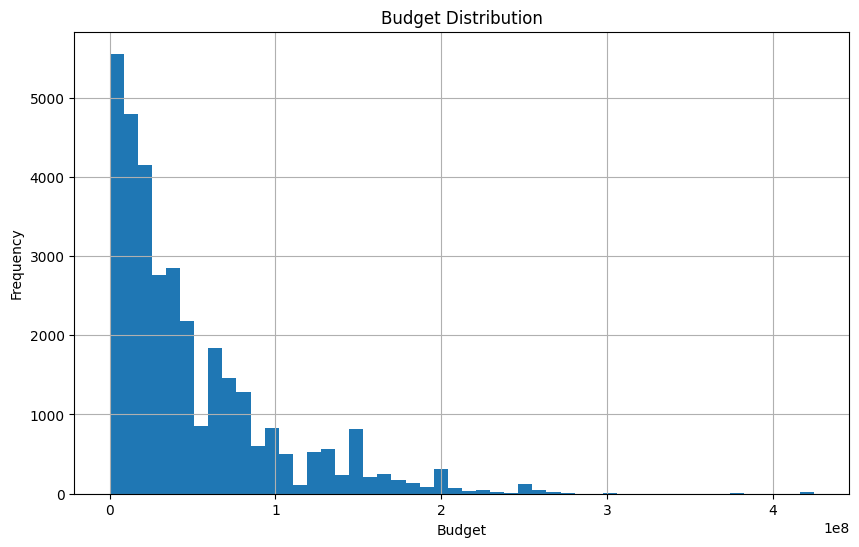

In [323]:
# Histogram of budget
plt.figure(figsize=(10, 6))
df_revenue['budget'].hist(bins=50)
plt.title('Budget Distribution')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Budget Distribution:
- The histogram of the budget column shows that most movies have budgets between 0 and 50 million.
- There are a few movies with budgets above 200 million, which are considered outliers.
- The distribution of the budget column is right-skewed, indicating that most movies have lower budgets.


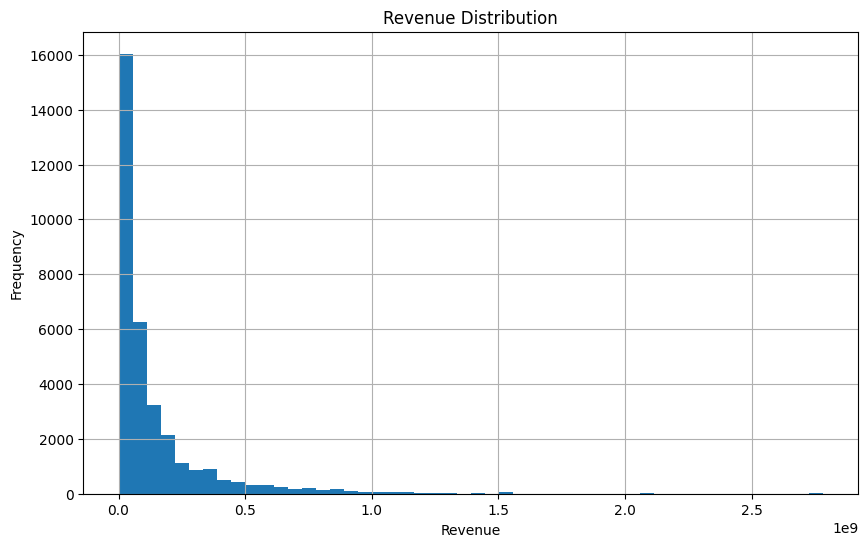

In [324]:
# Histogram of revenue
plt.figure(figsize=(10, 6))
df_revenue['revenue'].hist(bins=50)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Revenue Distribution:
- The histogram of the revenue column shows that most movies have revenues between 0 and 200 million.
- There are a few movies with revenues above 1 billion, which are considered outliers.
- The distribution of the revenue column is right-skewed, indicating that most movies have lower revenues.

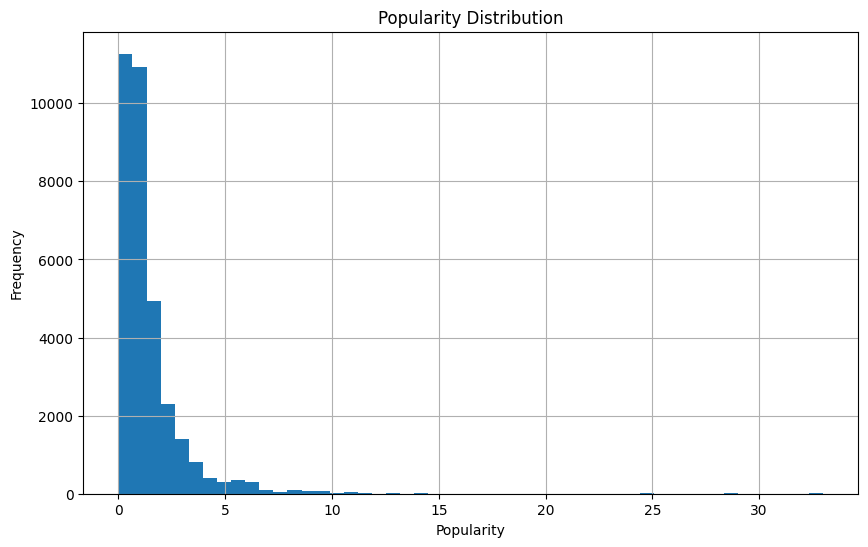

In [325]:
# Histogram of popularity
plt.figure(figsize=(10, 6))
df_revenue['popularity'].hist(bins=50)
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Popularity Distribution:
- The histogram of the popularity column shows that most movies have popularity scores between 0 and 2.
- There are a few movies with popularity scores above 10, which are considered outliers.
- The distribution of the popularity column is right-skewed, indicating that most movies have lower popularity scores.

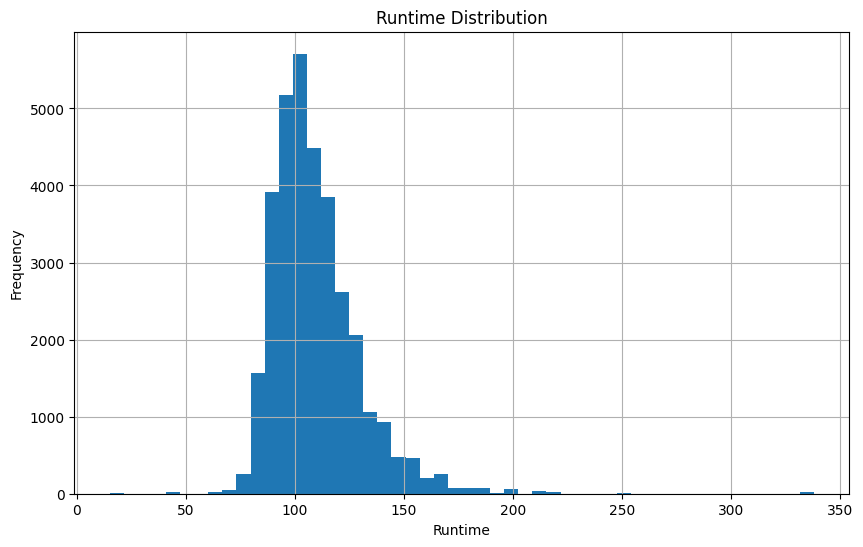

In [326]:
# Histogram of runtime
plt.figure(figsize=(10, 6))
df_revenue['runtime'].hist(bins=50)
plt.title('Runtime Distribution')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Runtime Distribution:
- The histogram of the runtime column shows that most movies have runtimes between 80 and 120 minutes.
- There are a few movies with runtimes above 200 minutes, which are considered outliers.
- The distribution of the runtime column is like a normal distribution, with a peak around 100 minutes.


**** Two-variable (2D) Exploration ****

In [327]:
# Calculate the correlation between budget, popularity, runtime, and revenue
correlation_matrix = df_revenue.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
               budget   revenue  popularity   runtime
budget      1.000000  0.712730    0.447625  0.260992
revenue     0.712730  1.000000    0.614051  0.254964
popularity  0.447625  0.614051    1.000000  0.230251
runtime     0.260992  0.254964    0.230251  1.000000


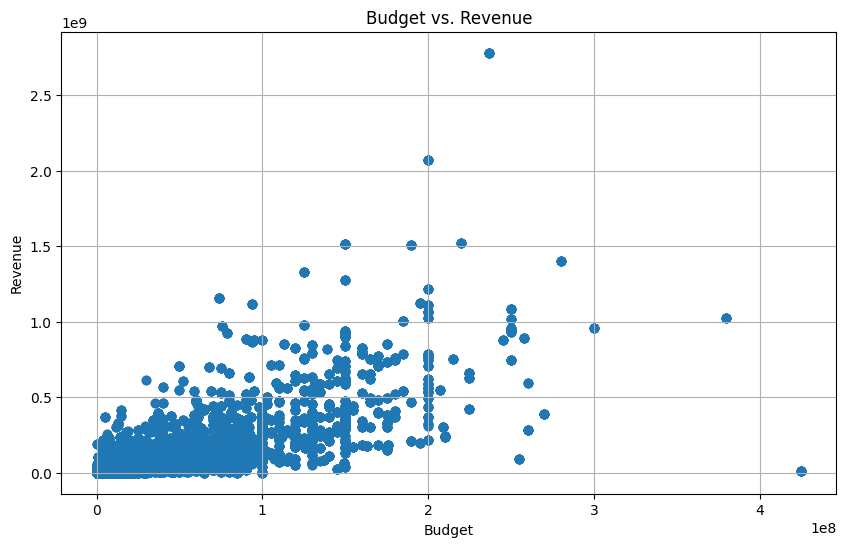

In [328]:
# Scatter plot of budget vs. revenue
plt.figure(figsize=(10, 6))
plt.scatter(df_revenue['budget'], df_revenue['revenue'], alpha=0.5)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

#### Budget vs. Revenue:
- The scatter plot shows a positive relationship between budget and revenue, with higher budgets generally leading to higher revenues.
- There are some movies with high budgets and low revenues, which are considered outliers.
- The majority of movies have budgets below 200 million and revenues below 1 billion.
- The scatter plot indicates a strong positive correlation between budget and revenue, as shown in the correlation matrix.
- The data points are spread out across the plot, indicating a wide range of budget and revenue values.
- The relationship between budget and revenue is not linear, with some movies having high budgets but low revenues.


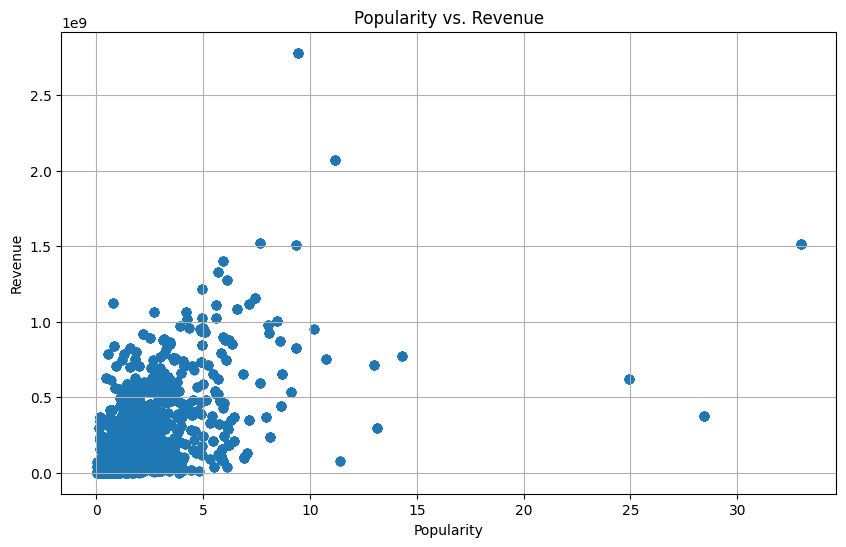

In [329]:
# Scatter plot of popularity vs. revenue
plt.figure(figsize=(10, 6))
plt.scatter(df_revenue['popularity'], df_revenue['revenue'], alpha=0.5)
plt.title('Popularity vs. Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

#### Popularity vs. Revenue:
- The scatter plot shows a positive relationship between popularity and revenue, with higher popularity scores generally leading to higher revenues.
- There are some movies with high popularity scores and low revenues, which are considered outliers.
- The majority of movies have popularity scores below 10 and revenues below 1 billion.
- The scatter plot indicates a moderate positive correlation between popularity and revenue, as shown in the correlation matrix.
- The data points are spread out across the plot, indicating a wide range of popularity and revenue values.
- The relationship between popularity and revenue is not linear, with some movies having high popularity scores but low revenues.
- The scatter plot shows that movies with higher popularity scores tend to have higher revenues.


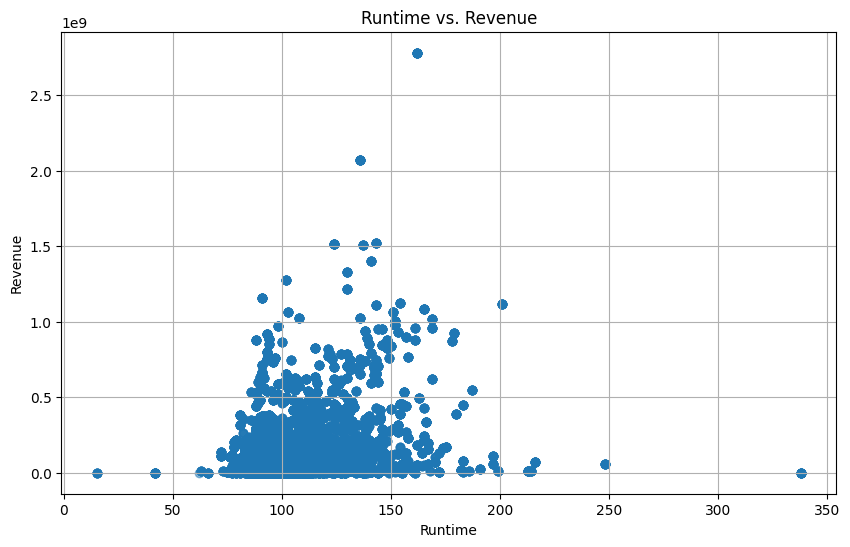

In [330]:
# Scatter plot of runtime vs. revenue
plt.figure(figsize=(10, 6))
plt.scatter(df_revenue['runtime'], df_revenue['revenue'], alpha=0.5)
plt.title('Runtime vs. Revenue')
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

#### Runtime vs. Revenue:
- The scatter plot shows a weak positive relationship between runtime and revenue, with longer runtimes generally leading to higher revenues.
- There are some movies with long runtimes and low revenues, which are considered outliers.
- The majority of movies have runtimes below 200 minutes and revenues below 1 billion.
- The scatter plot indicates a weak positive correlation between runtime and revenue, as shown in the correlation matrix.
- The data points are spread out across the plot, indicating a wide range of runtime and revenue values.
- The relationship between runtime and revenue is not linear, with some movies having long runtimes but low revenues.
- The scatter plot shows that movies with longer runtimes tend to have higher revenues.
- The scatter plot also shows that most movies have runtimes between 80 and 120 minutes.
- The scatter plot indicates that runtime is not a strong predictor of revenue compared to budget and popularity.


**** Three-variable (3D) Exploration ****

- The three-variable exploration involves analyzing the relationship *between*, *budget*, *revenue*, and *popularity* to identify patterns and trends in the data.
- Runtime is not included in this analysis to focus on the main variables of interest because it has a weaker correlation with revenue compared to budget and popularity.


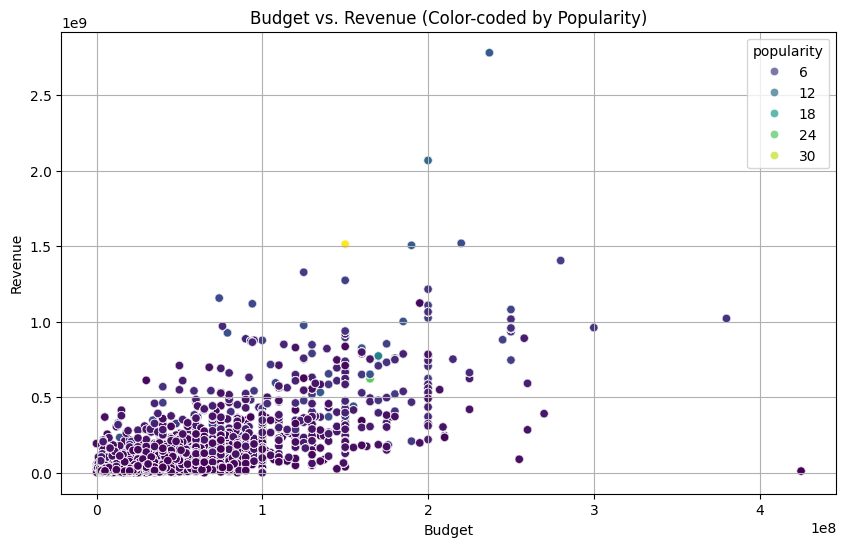

In [331]:
# Scatter plot of budget vs. revenue, color-coded by popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', hue='popularity', data=df_revenue, palette='viridis', alpha=0.7)
plt.title('Budget vs. Revenue (Color-coded by Popularity)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

#### Budget vs. Revenue (Color-coded by Popularity):
- The scatter plot shows a positive relationship between budget and revenue, with higher budgets generally leading to higher revenues.
- The data points are color-coded by popularity, with higher popularity scores shown in darker shades.
- The scatter plot indicates that movies with higher budgets and popularity scores tend to have higher revenues.
- The relationship between budget and revenue is not linear, with some movies having high budgets but low revenues.
- The scatter plot shows that the majority of movies have budgets below 200 million and revenues below 1 billion.
- The scatter plot indicates a strong positive correlation between budget and revenue, as shown in the correlation matrix.
- The data points are spread out across the plot, indicating a wide range of budget, revenue, and popularity values.
- The scatter plot provides a visual representation of the relationship between budget, revenue, and popularity.
- The scatter plot shows that movies with higher budgets and popularity scores tend to have higher revenues.
- The scatter plot also shows that most movies have popularity scores below 10.
- The scatter plot indicates that budget and popularity are important factors in predicting revenue.


### How does the release date impact the popularity of movies?
   - **Dependent Variable**: Popularity
   - **Independent Variables**: Release Date, Genres, Vote Count


In [338]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
#  Filter the dataset to include only relevant columns and non-zero values
df_popularity = df[['release_year', 'popularity', 'genres', 'vote_count']]
df_popularity = df_popularity[(df_popularity['popularity'] > 0) & (df_popularity['vote_count'] > 0)]


In [342]:
# Display summary statistics for popularity and vote count
print("Summary Statistics:\n", df_popularity.describe())

Summary Statistics:
        release_year    popularity    vote_count
count  33508.000000  33508.000000  33508.000000
mean    2009.476215      1.434139    701.597559
std       10.294378      1.848136   1053.298972
min     2000.000000      0.001117     10.000000
25%     2005.000000      0.543869    110.000000
50%     2008.000000      0.932599    308.000000
75%     2012.000000      1.643140    811.000000
max     2068.000000     32.985763   9767.000000


#### Summary Statistics:
- The average popularity score of movies is approximately 1.5, with a maximum popularity score of 32.98.
- The average vote count of movies is approximately 113.5, with a maximum vote count of 9767.
- The popularity column has a wide range of values, with a maximum value of 32.98.
- The release_year column has a range from 2000 to 2068.
- The 2000 to 2068 range in the release_year column indicates incorrect data, as movies cannot be released in the future.
- We will filter out movies with release years above 2021 to remove incorrect data.


In [343]:
# Filter out movies with release years above 2021
df_popularity = df_popularity.query('release_year <= 2021')


*** Single-variable (1D) Exploration ***

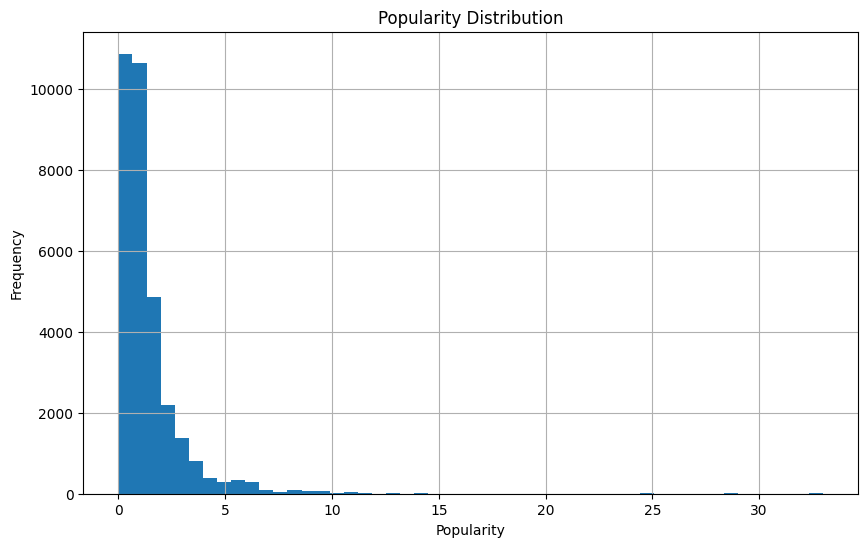

In [345]:
# Histogram of popularity
plt.figure(figsize=(10, 6))
df_popularity['popularity'].hist(bins=50)
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### Popularity Distribution:
- The histogram of the popularity column shows that most movies have popularity scores between 0 and 2.
- There are a few movies with popularity scores above 10, which are considered outliers.
- The distribution of the popularity column is right-skewed, indicating that most movies have lower popularity scores.
- The histogram indicates that popularity scores are concentrated around 0 to 2, with a few movies having higher scores.
- The popularity scores are spread out across the range, with a peak around 0 to 2.


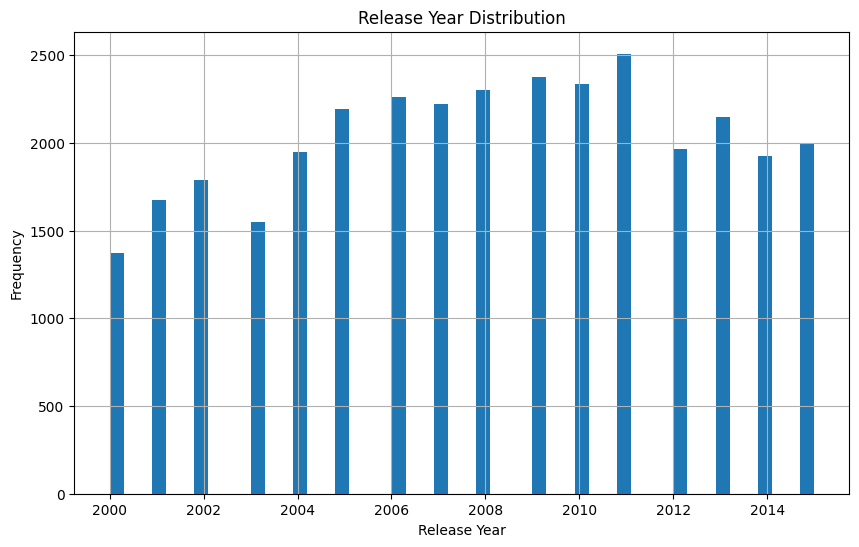

In [348]:
# Histogram of release year
plt.figure(figsize=(10, 6))
df_popularity['release_year'].hist(bins=50)
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Release Year Distribution:
- The histogram of the release_year column shows that most movies were released between 2000 and 2016.
- The distribution of the year of release column shows that most films were released between 2006 and 2011.
- The histogram indicates that the number of movies released has increased over the years, with a peak around 2010.


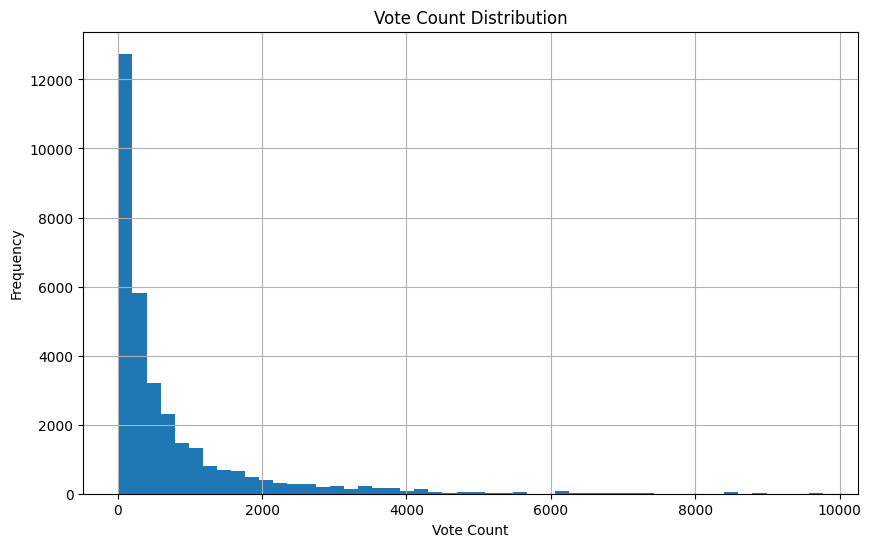

In [349]:
# Histogram of vote count
plt.figure(figsize=(10, 6))
df_popularity['vote_count'].hist(bins=50)
plt.title('Vote Count Distribution')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Vote Count Distribution:
- The histogram of the vote_count column shows that most movies have vote counts between 0 and 100.
- There are a few movies with vote counts above 1000, which are considered outliers.
- The distribution of the vote_count column is right-skewed, indicating that most movies have lower vote counts.
- The vote counts are spread out across the range, with a peak around 0 to 100.

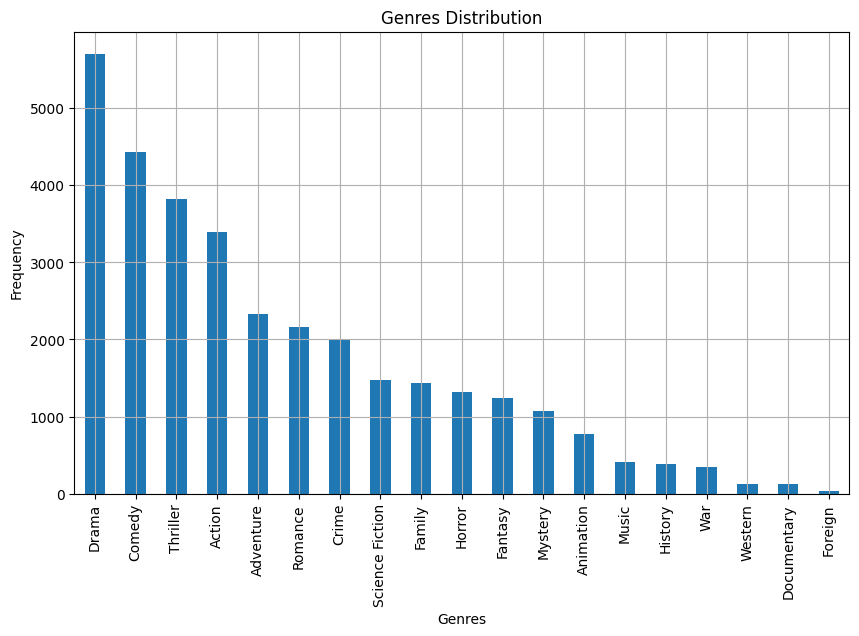

In [347]:
# Histogram of genres
plt.figure(figsize=(10, 6))
df_popularity['genres'].value_counts().plot(kind='bar')
plt.title('Genres Distribution')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Genres Distribution:
- The bar chart of the genres column shows the frequency of each genre in the dataset.
- The bar chart indicates the number of movies in each genre category.
- The genres column contains a wide range of genres, including Action, Comedy, Drama, Horror, and more.
- The bar chart shows the distribution of movies across different genres.
- The genres column can be further analyzed to identify trends in popularity based on genres.
- The drama genre appears to be the most common, followed by comedy, thriller, action, and romance.


*** Two-variable (2D) Exploration ***

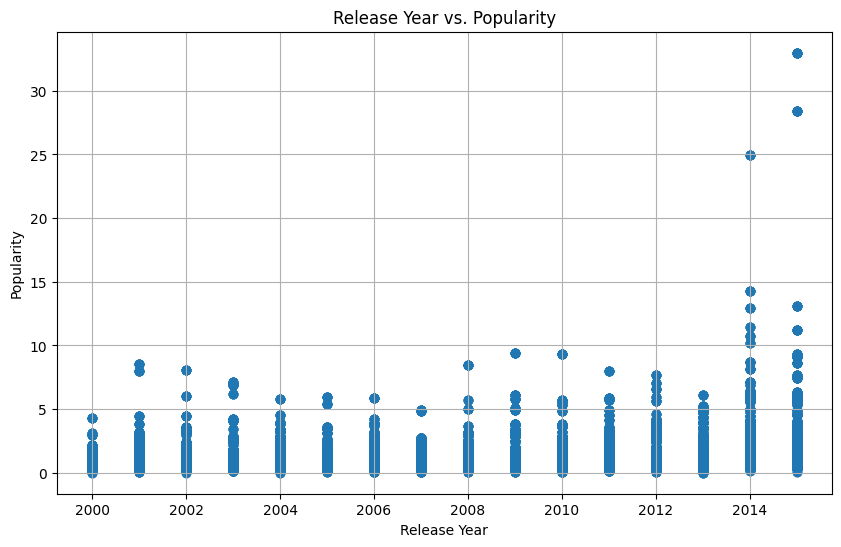

In [350]:
# Scatter plot of release year vs. popularity
plt.figure(figsize=(10, 6))
plt.scatter(df_popularity['release_year'], df_popularity['popularity'], alpha=0.5)
plt.title('Release Year vs. Popularity')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

#### Release Year vs. Popularity:
- The scatter plot shows the relationship between release year and popularity of movies.
- The popularity scores are spread out across the range of release years.
- The scatter plot indicates that the popularity of movies varies over time.
- The popularity scores are concentrated around 0 to 3 for most release years.
- The scatter plot shows that movies released in recent years have higher popularity scores.
- Last few years have higher popularity scores compared to earlier years.
- The last two years have the highest popularity scores, indicating a trend of increasing popularity over time.

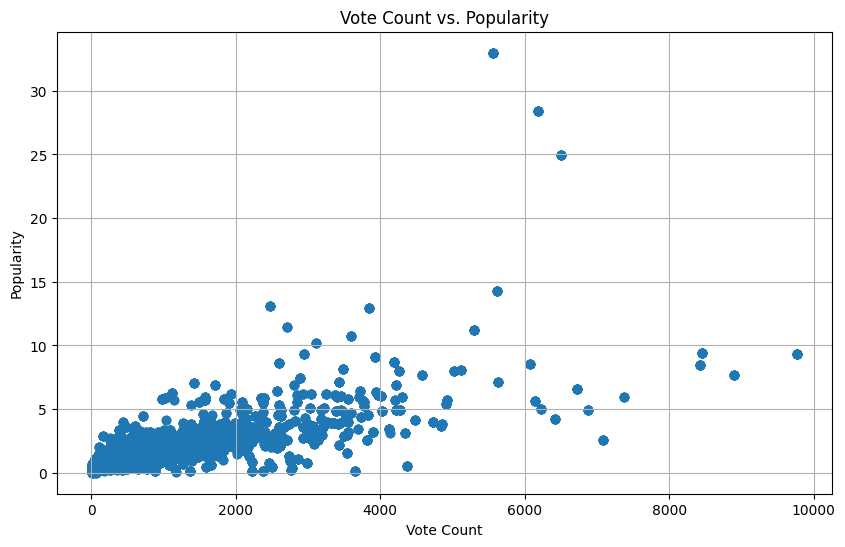

In [351]:
# Scatter plot of vote count vs. popularity
plt.figure(figsize=(10, 6))
plt.scatter(df_popularity['vote_count'], df_popularity['popularity'], alpha=0.5)
plt.title('Vote Count vs. Popularity')
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

#### Vote Count vs. Popularity:
- The scatter plot shows the relationship between vote count and popularity of movies.
- The popularity scores are spread out across the range of vote counts.
- The scatter plot indicates that movies with higher vote counts tend to have higher popularity scores.
- The popularity scores are concentrated around 0 to 4 for most vote counts.

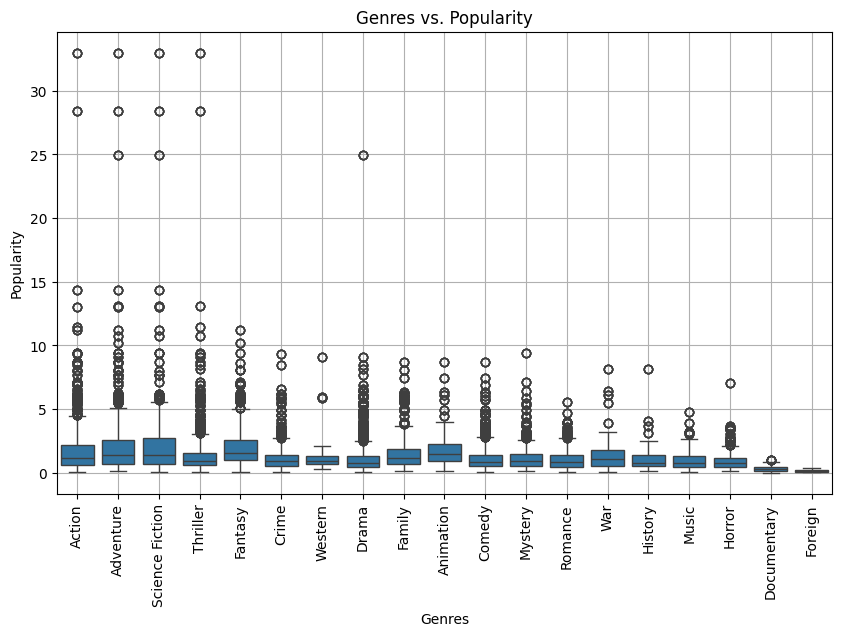

In [352]:
# Scatter plot of genres vs. popularity
plt.figure(figsize=(10, 6))
sns.boxplot(x='genres', y='popularity', data=df_popularity)
plt.title('Genres vs. Popularity')
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

#### Genres vs. Popularity:
- The box plot shows the relationship between genres and popularity of movies.
- The popularity scores are spread out across different genres.
- The box plot indicates that some genres have higher popularity scores than others.
- The drama genre has the highest median popularity score, followed by adventure, science fiction, and fantasy.


*** Three-variable (3D) Exploration ***

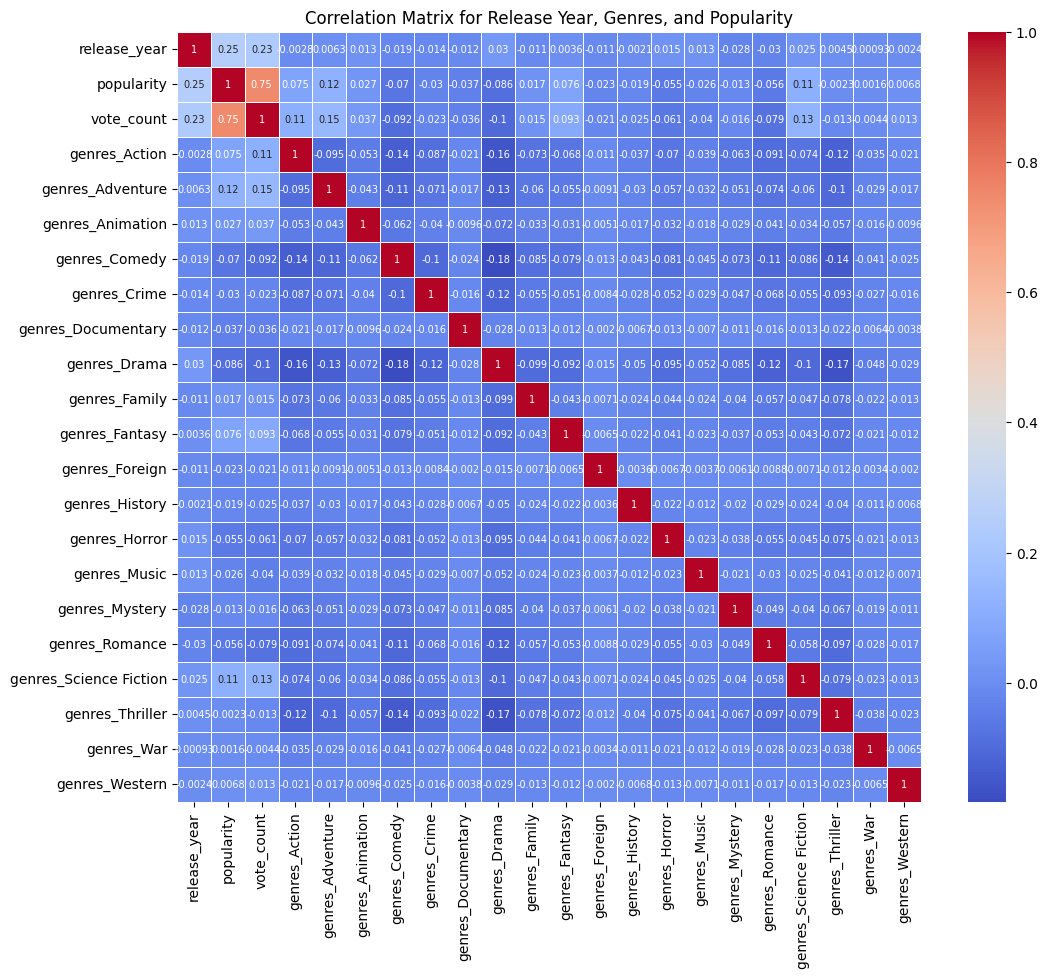

In [360]:
# Correlation matrix for release year, genres, and popularity
# One-hot encode the genres column
df_encoded = pd.get_dummies(df_popularity, columns=['genres'])

# Select relevant columns for the correlation matrix
columns_of_interest = ['release_year', 'popularity', 'vote_count'] + [col for col in df_encoded.columns if col.startswith('genres_')]
df_corr = df_encoded[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 7})
plt.title('Correlation Matrix for Release Year, Genres, and Popularity')
plt.show()

#### Correlation Matrix:
- The correlation matrix shows the relationship between release year, genres, and popularity of movies.
- The correlation values range from -1 to 1, with 1 indicating a strong positive relationship, -1 indicating a strong negative relationship, and 0 indicating no relationship.
- The correlation matrix provides insights into the relationships between different variables in the dataset.
- The heatmap visualizes the correlation matrix, with darker colors indicating stronger relationships.
- The correlation matrix can be used to identify patterns and trends in the data.
- The release year has a weak positive correlation with popularity and vote count, indicating a slight increase in popularity over time.
- The genres have varying correlations with popularity, with some genres having higher popularity scores than others.
- The correlation matrix provides a comprehensive view of the relationships between release year, genres, and popularity.
- The heatmap helps visualize the correlation values and identify patterns in the data.


Three-variable (3D) Exploration:
- We use a correlation matrix and heatmap to visualize the relationships between these variables and identify any significant correlations.
- The correlation matrix provides insights into the relationships between release year, genres, vote count and popularity of movies.
- We will analyze:
 - two independent variables (release year and genres) and their impact on the dependent variable (popularity).
 - two independent variables (genres and vote count) and their impact on the dependent variable (popularity).


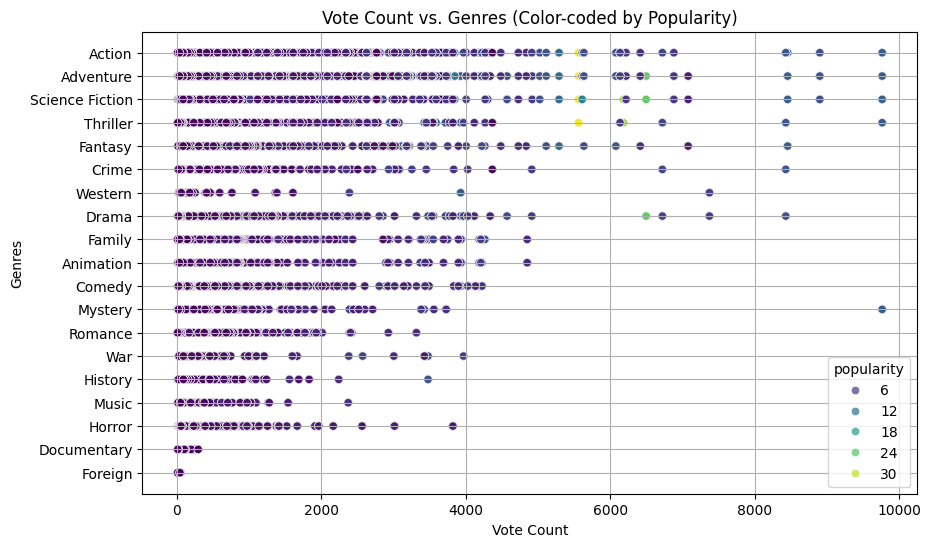

In [371]:
# Scatter plot of vote count vs genres, color-coded by popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_count', y='genres', hue='popularity', data=df_popularity, palette='viridis', alpha=0.7)
plt.title('Vote Count vs. Genres (Color-coded by Popularity)')
plt.xlabel('Vote Count')
plt.ylabel('Genres')
plt.grid(True)
plt.show()


#### Vote Count vs. Genres  (Color-coded by Popularity):
- The scatter plot shows the relationship between vote count and popularity of movies, color-coded by genres.
- The popularity scores are spread out across different vote counts and genres.
- The scatter plot indicates that movies with higher vote counts tend to have higher popularity scores.
- The popularity scores are concentrated around 0 to 4 for most vote counts and genres.
- The most popular genres include adventure, science fiction, fantasy, and action.
- When vote count is high, the popularity scores are also high for these genres.

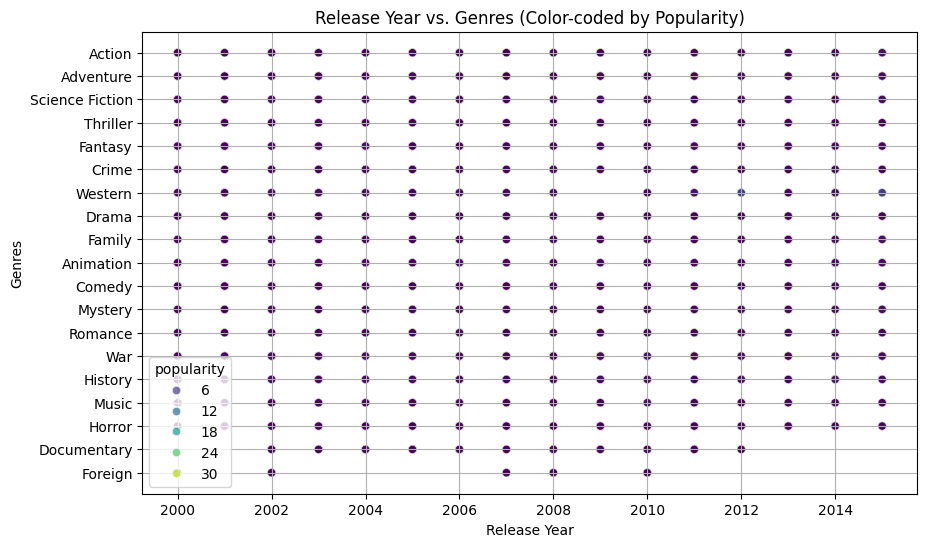

In [369]:
# Scatter plot of release year vs genres, color-coded by popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='genres', hue='popularity', data=df_popularity, palette='viridis', alpha=0.7)
plt.title('Release Year vs. Genres (Color-coded by Popularity)')
plt.xlabel('Release Year')
plt.ylabel('Genres')
plt.grid(True)
plt.show()

#### Release Year vs. Genres (Color-coded by Popularity):
- The scatter plot shows the relationship between release year and genres of movies, color-coded by popularity.
- The popularity scores are spread out across different release years and genres.
- The most popular genres include adventure, science fiction, fantasy, and action.
- The scatter plot indicates that movies in these genres have higher popularity scores over time.

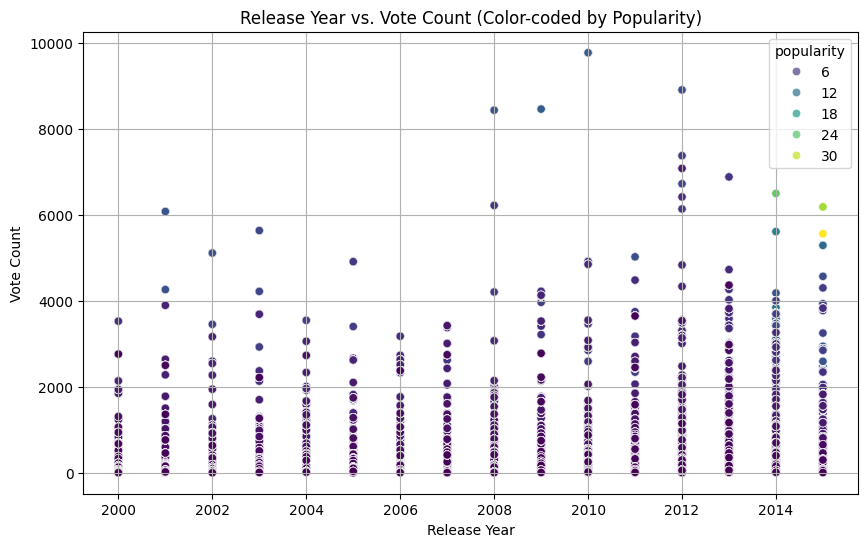

In [370]:
# Scatter plot of release year vs vote count, color-coded by popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='vote_count', hue='popularity', data=df_popularity, palette='viridis', alpha=0.7)
plt.title('Release Year vs. Vote Count (Color-coded by Popularity)')
plt.xlabel('Release Year')
plt.ylabel('Vote Count')
plt.grid(True)
plt.show()

#### Release Year vs. Vote Count (Color-coded by Popularity):
- The scatter plot shows the relationship between release year and vote count of movies, color-coded by popularity.
- The popularity scores are spread out across different release years and vote counts.
- The scatter plot indicates that movies with higher vote counts tend to have higher popularity scores.
- The last few years have higher vote counts and popularity scores compared to earlier years.
- The scatter plot shows a trend of increasing vote counts and popularity scores over time.
- The popularity scores are concentrated around 0 to 4 for most release years and vote counts.

 ###  Which genres are most popular from year to year ?
   - **Dependent Variable**: Popularity
   - **Independent Variables**: Release Year, Genres

#### Release Year Distribution:
- The histogram of the release_year column shows that most movies were released between 2000 and 2020.
-

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [333]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

C:\Users\przem\AppData\Local\Programs\Python\Python312\python.exe: No module named nbconvert
